# Restricted Boltzmann Machine

In this code we will try to apply a Bernoulli Restricted Boltzamnn Machine (RBM) to the MNIST dataset composed of handwritten digits.

## Data Pre-Processing
The MNIST database of handwritten digits between 0 and 9, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size gray-scaled image of 28x28. <br>

The first step before any deep learning modelization is to load and preprocess our dataset.

First we will import necessary libraries for this part.

In [47]:
import numpy as np
import seaborn as sns
from keras.datasets import mnist
from keras.utils import to_categorical
from matplotlib import pyplot as plt
from random import randint

After that, we load the MNIST dataset.

In [48]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Training Set Shape:', x_train.shape)
print('Test Set Shape:', x_test.shape)

Training Set Shape: (60000, 28, 28)
Test Set Shape: (10000, 28, 28)


We can visualize a portion of our dataset to have an idea about its general form. 

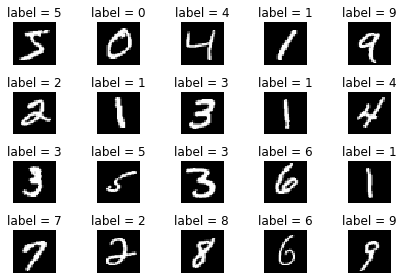

In [49]:
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title('label = {}'.format(y_train[i]))
    plt.axis('off')
plt.tight_layout()
plt.show()

The images should be reshaped by pixels so that each row in our training and testing set represents an image, that's 784 columns in total.

In [50]:
num_pixels = 784

x_train = x_train.reshape(x_train.shape[0], num_pixels)
x_test = x_test.reshape(x_test.shape[0], num_pixels)

print('Training Set New Shape:', x_train.shape)
print('Test Set New Shape:', x_test.shape)

Training Set New Shape: (60000, 784)
Test Set New Shape: (10000, 784)


We have 70 000 image of 28x28 = 784 pixels, 60 000 of them are for training and 10 000 for testing the model. <br>
Labels are digits from 0 to 9.

In [51]:
digits = np.unique(y_test)

print("Digits:", digits)

Digits: [0 1 2 3 4 5 6 7 8 9]


We can print each digit's frequency in a plot and make sure that there is no bias between the repartition of digits.

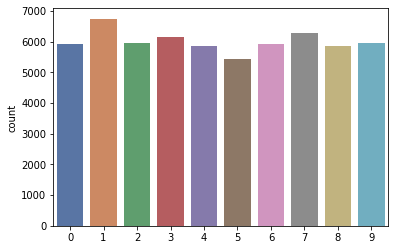

In [52]:
sns.countplot(x=y_train, palette='deep');

Labels from 0 to 9 are now represented by the following:

The MNIST dataset is represented as unsigned 8-bit integers, falling within the range [0, 255].
To use BernoulliRBM , we need that our feature vectors fall within the range [0, 1]. So it's important to  scale the columns into the range [0, 1],

In [53]:
def scale(x, min=0, max=1, eps=0.001):
    return ((x - np.min(x, axis=0))/(np.max(x, axis=0) - np.min(x, axis=0) + eps)) * (max - min) + min

X_train = scale(x_train, 0, 1)
X_test = scale(x_test, 0, 1)

## Building the RBM Machine

For gray-scale image data where pixel values can be interpreted as degrees of blackness on a white background, like handwritten digit recognition, the Bernoulli Restricted Boltzmann Machine model (RBM) can perform effective non-linear feature extraction.


For building the RBM, we will import necessary libraries for this part.

In [54]:
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

The <b>sklearn</b> library provides an implementation for the Bernoulli Restricted Boltzmann Machine, with binary visible units and binary hidden units.

In [55]:
rbm = BernoulliRBM(n_components=50, learning_rate=0.1, batch_size=10, n_iter=10, verbose=1, random_state=0)

For classification of the model, we will use a logistic regression algorithm based on sigmoid function.
This classification can be seen as a binary one, because this algorithm will try to classify a sample within 2 categories: either it's a specific digit or it is not (belongs to the other 9 digits classes).

In [56]:
logistic = LogisticRegression(solver='newton-cg', C=10)

To combine these two algorithms, we use a <b>Pipeline</b>, the first one is for training the model, and the second for categorical classification.

In [57]:
classifier = Pipeline([('rbm', rbm), ('logistic', logistic)])

Now we will train our model, apply it on our test set and print out the classification report.

In [58]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

[BernoulliRBM] Iteration 1, pseudo-likelihood = -116.74, time = 7.99s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -113.04, time = 9.05s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -110.49, time = 9.09s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -108.70, time = 9.01s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -113.35, time = 8.69s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -105.02, time = 9.46s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -110.22, time = 8.89s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -106.98, time = 8.69s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -108.97, time = 8.69s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -105.78, time = 8.73s
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.98      0.98      0.98      1135
           2       0.91      0.89      0.90      1032
           3       0.87      0.88      0.87      1010
           4       0.91     

We will print this classification report prettier.

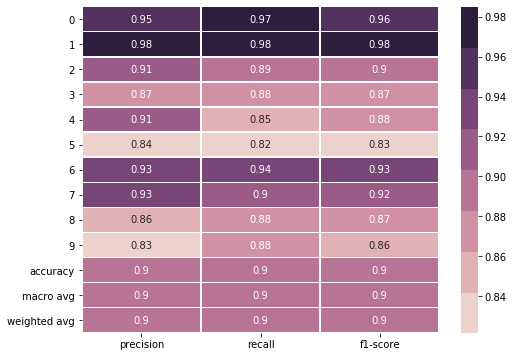

In [59]:
import pandas as pd

clf_report = classification_report(y_test, y_pred, output_dict=True)
plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, 
            linewidths=.5, cmap = sns.cubehelix_palette(8));

The accuracy score is:

In [60]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy =', acc)

Accuracy = 0.902


Let's print out the confusion matrix of this model.

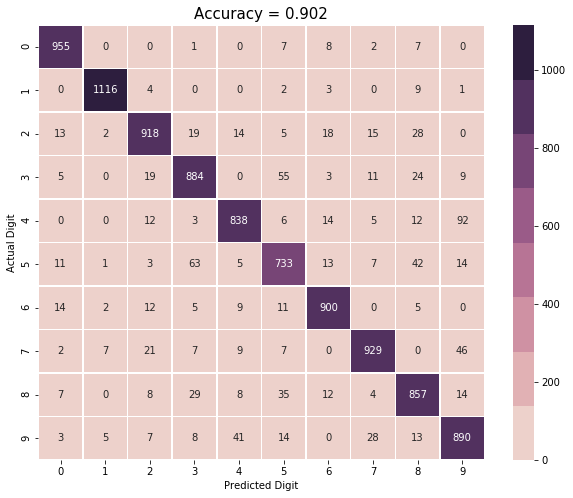

In [61]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap = sns.cubehelix_palette(8));
plt.ylabel('Actual Digit');
plt.xlabel('Predicted Digit');
all_sample_title = 'Accuracy = {0}'.format(acc)
plt.title(all_sample_title, size = 15);

## Fine Tuning the Model
For both the Logistic Regression and RBM estimators, we used nearly-arbitrary parameters and they turned up to give good results. However, we can boost those results by trying multiple values of these parameters and choose the best within them to base our model on them. <br>This is done with the help of a <b>Grid Search</b> estimator given by the <b>sklearn</b> library.<br>
We will begin by importing it.

In [62]:
from sklearn.model_selection import GridSearchCV

Next we will prepare the RBM and the Logistic Regression classifier with some fixed values, in addition to the Pipeline.

In [63]:
gs_rbm = BernoulliRBM(batch_size=10, verbose=1, random_state=0)
gs_logistic = LogisticRegression()
gs_classifier = Pipeline([('gs_rbm', gs_rbm), ('gs_logistic', gs_logistic)])

we want to tune the following parameters:<br>
<b>rbm: </b> {n_components, learning_rate, n_iter}<br>
<b>logistic :</b> {solver, C}
<br>For that we will create a dict that holds values of each parameter that will be tested.

In [64]:
param_grid = {
    'gs_rbm__n_components': [100, 150, 200],
    'gs_rbm__learning_rate': [0.001, 0.01, 0.1],
    'gs_logistic__solver': ['newton-cg', 'liblinear'],
    'gs_logistic__C': [1, 10, 100]
}

Finally we will create a Grid Search estimator, and let it search for the best model from given parameters.<br>k-Fold Cross Validation will be disabled as it is not our goal in this application.
<br>This probably will take several hours.

In [65]:
cv = [(slice(None), slice(None))]

gs = GridSearchCV(gs_classifier, param_grid, n_jobs=-1, verbose=5, cv=cv)
gs.fit(X_train, y_train)

print("Best parameter (CV score=%0.4f):" % gs.best_score_)
print(gs.best_params_)

Fitting 1 folds for each of 54 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed: 157.3min finished


[BernoulliRBM] Iteration 1, pseudo-likelihood = -97.15, time = 16.09s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -86.19, time = 17.71s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -80.84, time = 17.99s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -77.90, time = 18.16s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -74.86, time = 17.67s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -74.05, time = 17.69s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -72.00, time = 17.70s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -72.19, time = 19.70s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -70.30, time = 17.76s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -70.48, time = 17.83s
Best parameter (CV score=0.9642):
{'gs_logistic__C': 100, 'gs_logistic__solver': 'newton-cg', 'gs_rbm__learning_rate': 0.01, 'gs_rbm__n_components': 200}


The best parameters between all of those provided are: <br>
<b>C:</b> 100<br>
<b>solver: </b>'newton-cg'<br>
<b>learning_rate: </b>0.01<br>
<b>n_components: </b>200<br>

Let's apply it on our test set and print out the classification report.

In [66]:
y_pred_gs = gs.predict(X_test)
print(classification_report(y_test, y_pred_gs))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.94      0.95      0.94      1032
           3       0.94      0.95      0.94      1010
           4       0.96      0.95      0.96       982
           5       0.95      0.93      0.94       892
           6       0.96      0.97      0.96       958
           7       0.96      0.94      0.95      1028
           8       0.94      0.94      0.94       974
           9       0.94      0.94      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



We will print this classification report prettier.

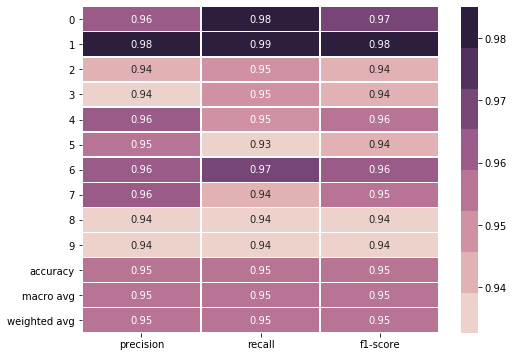

In [67]:
import pandas as pd

clf_report_gs = classification_report(y_test, y_pred_gs, output_dict=True)
plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(clf_report_gs).iloc[:-1, :].T, annot=True, 
            linewidths=.5, cmap = sns.cubehelix_palette(8));

The accuracy score is:

In [68]:
acc_gs = accuracy_score(y_test, y_pred_gs)
print('Accuracy = ', acc_gs)

Accuracy =  0.9539


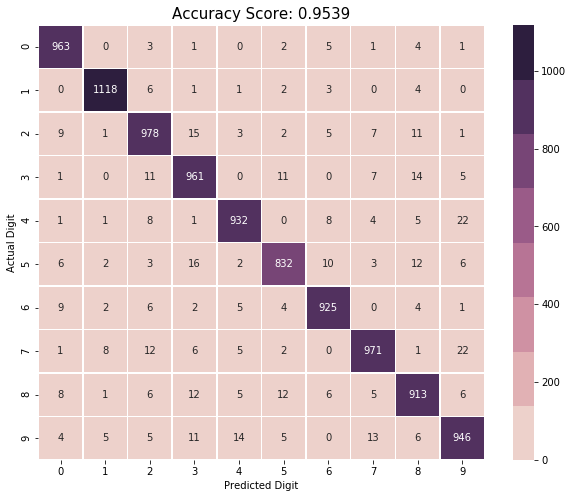

In [69]:
cm_gs = confusion_matrix(y_test, y_pred_gs)

plt.figure(figsize=(10,8))
sns.heatmap(cm_gs, annot=True, fmt="d", linewidths=.5, cmap = sns.cubehelix_palette(8));
plt.ylabel('Actual Digit');
plt.xlabel('Predicted Digit');
all_sample_title = 'Accuracy Score: {0}'.format(acc_gs)
plt.title(all_sample_title, size = 15);

Fine tuning the model can dramatically help improve its performance. However, the provided parameters should be significantly meaningful as it takes time and resources to search over all the possible combinations between tested parameters.